# ANalysis Of VAriance (ANOVA)

## What is ANOVA?

ANOVA test used to compare the means of more than 2 groups.
Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable).
Note: In ANOVA, group, factors, and independent variables are similar terms

### ANOVA Hypotheses

1. Null hypothesis: Groups means are equal (no variation in means of groups)
    H0: μ1=μ2=…=μp
2. Alternative hypothesis: At least, one group mean is different from other groups
    H1: All μ are not equal

### How ANOVA works?

1. Check sample sizes: equal number of observation in each group
2. Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
3. Calculate Mean Square error (MSE) (SS error/df of residuals)
4. Calculate F value (MS of group/MSE)
5. Calculate p value based on F value and degrees of freedom (df)

## One-way (one factor) ANOVA 

### One-way ANOVA Implementation

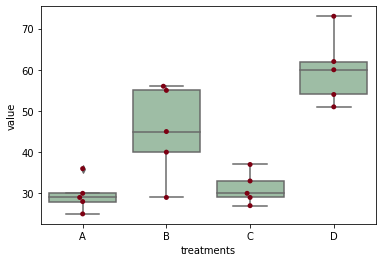

In [2]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [3]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [4]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN

### Interpretation

The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

### Test ANOVA assumptions

1. ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.
2. The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes.

In [7]:
!pip install bioinfokit

     |████████████████████████████████| 92kB 1.7MB/s eta 0:00:01
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56008 sha256=294bd87271a2dde1f8b02270cad932a910b918309152a3e593c2cf2f63ebb10d
  Stored in directory: /home/aarush100616/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-cp37-none-any.whl size=32065 sha256=7ef8d31b4466eea744dbc10613b77518a95662ee03ff4c9c463715bf19f54c11
  Stored in directory: /home/aarush100616/.cache/pip/wheels/c5/9c/ac/77b0c9151c4c264bec6ba18120d73bb24df5b4c1f09c17a41c
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=e89c92fac43d42f9ea388acf4c19b30b902da80cab67dd88850360742f90a7dd
  Stored in directory: /home/aarush100616/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit matplotlib-venn adjustText


In [8]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

group1 group2  Diff      Lower      Upper   q-value   p-value
0      A      B  15.4   1.692871  29.107129  4.546156  0.025070
1      A      C   1.6 -12.107129  15.307129  0.472328  0.900000
2      A      D  30.4  16.692871  44.107129  8.974231  0.001000
3      B      C  13.8   0.092871  27.507129  4.073828  0.048178
4      B      D  15.0   1.292871  28.707129  4.428074  0.029578
5      C      D  28.8  15.092871  42.507129  8.501903  0.001000

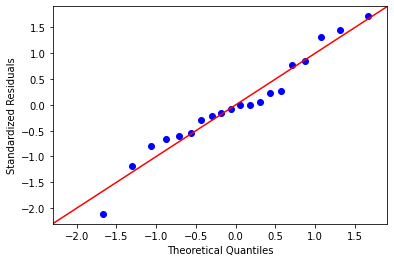

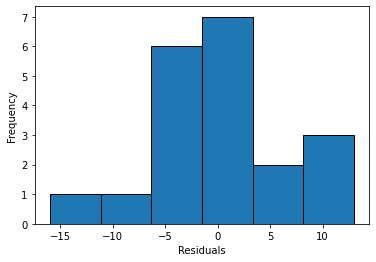

In [9]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed
In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

## Two-way (two factor) ANOVA (factorial design)

### Two-way ANOVA implementation

In [10]:
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

Genotype   years  value
0        A  1_year   1.53
1        A  1_year   1.83
2        A  1_year   1.38
3        B  1_year   3.60
4        B  1_year   2.94

<AxesSubplot:xlabel='Genotype', ylabel='value'>

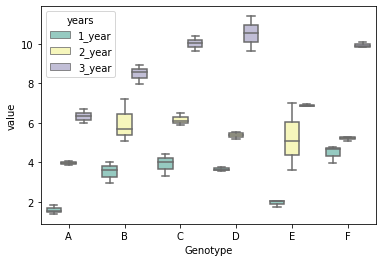

In [11]:
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq    df           F        PR(>F)
C(Genotype)            58.551733   5.0   32.748581  1.931655e-12
C(years)              278.925633   2.0  390.014868  4.006243e-25
C(Genotype):C(years)   17.122967  10.0    4.788525  2.230094e-04
Residual               12.873000  36.0         NaN           NaN

In [13]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=d_melt, res_var='value', anova_model='value~C(Genotype)+C(years)+C(Genotype):C(years)')
res.anova_summary

df      sum_sq     mean_sq           F        PR(>F)
C(Genotype)            5.0   58.551733   11.710347   32.748581  1.931655e-12
C(years)               2.0  278.925633  139.462817  390.014868  4.006243e-25
C(Genotype):C(years)  10.0   17.122967    1.712297    4.788525  2.230094e-04
Residual              36.0   12.873000    0.357583         NaN           NaN

### Interpretation

The p value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (p<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

As the interaction is significant, let’s visualize the interaction plot (also called profile plot) for interaction effects,

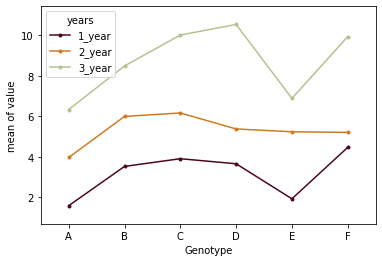

In [14]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

### Test ANOVA assumptions

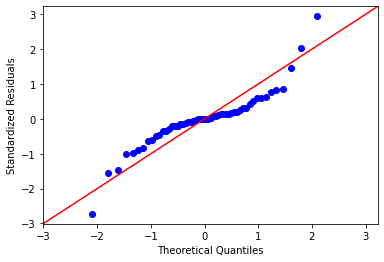

In [15]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

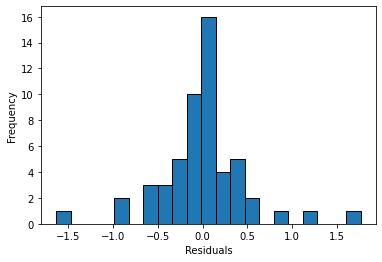

In [16]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In the residual plot, standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed. Besides, the histogram shows the approximately normal distribution of residuals.